In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.6 MB/s eta 0:00:00


In [ ]:
# import the libraries
import pandas as pd
import numpy as np

In [ ]:
# for database connection
import mysql.connector
from mysql.connector import Error

In [ ]:
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import clear_output

In [ ]:
# for data wrangling
import pandas as pd
import numpy as np

In [ ]:
# for data modelling
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

## DATA CONNECTION, CLEANING AND PREPROCESS

In [ ]:
# create a function for database connection

def connect_db(hostname, username, password, db_name, port):
  connection = None
  try:
    connection = mysql.connector.connect(
        host = hostname,
        user = username,
        passwd = password,
        database = db_name,
        port = port
    )
    print(f'Connected to Database {db_name} successfully')
  except Error as err:
    print(f'Error: {err}')

  return connection

In [ ]:
hostname = input('Host: ')
username = input('username: ')
password = input('password: ')
db_name = input('database: ')
port = input('port: ')
clear_output()

In [ ]:
connection = connect_db(hostname,username,password,db_name,port)

Connected to Database northwind successfully


In [ ]:
# A function for accessing the data

def read_query(connection, query):
  result = None
  try:
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
  except Error as err:
      print(f'Error: {err}')

  return result

In [ ]:
# inspect the day of the shipped products

query_2 = """
select o.orderid,p.productname, ca.categoryname,od.unitprice,
od.quantity,p.unitsonorder,s.supplierid,s.companyname,
s.contactname,0.freight, o.shippeddate,o.requireddate,s.country
from `Order Details` as od
join Orders as o on o.orderid = od.orderid
join Products as p on od.productid = p.productid
join Categories as ca on p.categoryid = ca.categoryid
join Suppliers as s on p.supplierid = s.supplierid
"""

data = read_query(connection = connection, query = query_2)
data = [list(x) for x in data]
columns = ['orderid','productname','categoryname','unitprice',
           'quantity','unitsorder','suppliers','companyname','contactname',
           'freight','shippeddate','requireddate','country']

data = pd.DataFrame(data = data, columns = columns)
data.head()

,orderid,productname,categoryname,unitprice,quantity,unitsorder,suppliers,companyname,contactname,freight,shippeddate,requireddate,country
0,10289,Aniseed Syrup,Condiments,8.0000,30,70,1,Exotic Liquids,Charlotte Cooper,0,1996-08-28,1996-09-23,UK
1,10405,Aniseed Syrup,Condiments,8.0000,50,70,1,Exotic Liquids,Charlotte Cooper,0,1997-01-22,1997-02-03,UK
2,10485,Aniseed Syrup,Condiments,8.0000,20,70,1,Exotic Liquids,Charlotte Cooper,0,1997-03-31,1997-04-08,UK
3,10540,Aniseed Syrup,Condiments,10.0000,60,70,1,Exotic Liquids,Charlotte Cooper,0,1997-06-13,1997-06-16,UK
4,10591,Aniseed Syrup,Condiments,10.0000,14,70,1,Exotic Liquids,Charlotte Cooper,0,1997-07-16,1997-07-21,UK


In [ ]:
# inspect missing values

data.isnull().sum()

,0
orderid,0
productname,0
categoryname,0
unitprice,0
quantity,0
unitsorder,0
suppliers,0
companyname,0
contactname,0
freight,0


In [ ]:
# check to make sure the data type is right

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   orderid       2155 non-null   int64         
 1   productname   2155 non-null   object        
 2   categoryname  2155 non-null   object        
 3   unitprice     2155 non-null   object        
 4   quantity      2155 non-null   int64         
 5   unitsorder    2155 non-null   int64         
 6   suppliers     2155 non-null   int64         
 7   companyname   2155 non-null   object        
 8   contactname   2155 non-null   object        
 9   freight       2155 non-null   object        
 10  shippeddate   2082 non-null   datetime64[ns]
 11  requireddate  2155 non-null   datetime64[ns]
 12  country       2155 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(7)
memory usage: 219.0+ KB


In [ ]:
data.describe()

,orderid,quantity,unitsorder,suppliers,shippeddate,requireddate
count,2155.000000,2155.000000,2155.000000,2155.000000,2082,2155
mean,10659.375870,23.812993,8.074246,14.488167,1997-08-04 04:05:31.988472704,1997-09-02 02:27:40.510440832
min,10248.000000,1.000000,0.000000,1.000000,1996-07-10 00:00:00,1996-07-24 00:00:00
25%,10451.000000,10.000000,0.000000,7.000000,1997-02-24 00:00:00,1997-03-18 12:00:00
50%,10657.000000,20.000000,0.000000,14.000000,1997-09-01 00:00:00,1997-10-02 00:00:00
75%,10862.500000,30.000000,0.000000,21.000000,1998-01-30 00:00:00,1998-03-03 00:00:00
max,11077.000000,130.000000,100.000000,29.000000,1998-05-06 00:00:00,1998-06-11 00:00:00
std,241.378032,19.022047,19.748983,8.228640,NaN,NaN


In [ ]:
data.head()

,orderid,productname,categoryname,unitprice,quantity,unitsorder,suppliers,companyname,contactname,freight,shippeddate,requireddate,country
0,10289,Aniseed Syrup,Condiments,8.0000,30,70,1,Exotic Liquids,Charlotte Cooper,0,1996-08-28,1996-09-23,UK
1,10405,Aniseed Syrup,Condiments,8.0000,50,70,1,Exotic Liquids,Charlotte Cooper,0,1997-01-22,1997-02-03,UK
2,10485,Aniseed Syrup,Condiments,8.0000,20,70,1,Exotic Liquids,Charlotte Cooper,0,1997-03-31,1997-04-08,UK
3,10540,Aniseed Syrup,Condiments,10.0000,60,70,1,Exotic Liquids,Charlotte Cooper,0,1997-06-13,1997-06-16,UK
4,10591,Aniseed Syrup,Condiments,10.0000,14,70,1,Exotic Liquids,Charlotte Cooper,0,1997-07-16,1997-07-21,UK


## DATA VISUALIZATION

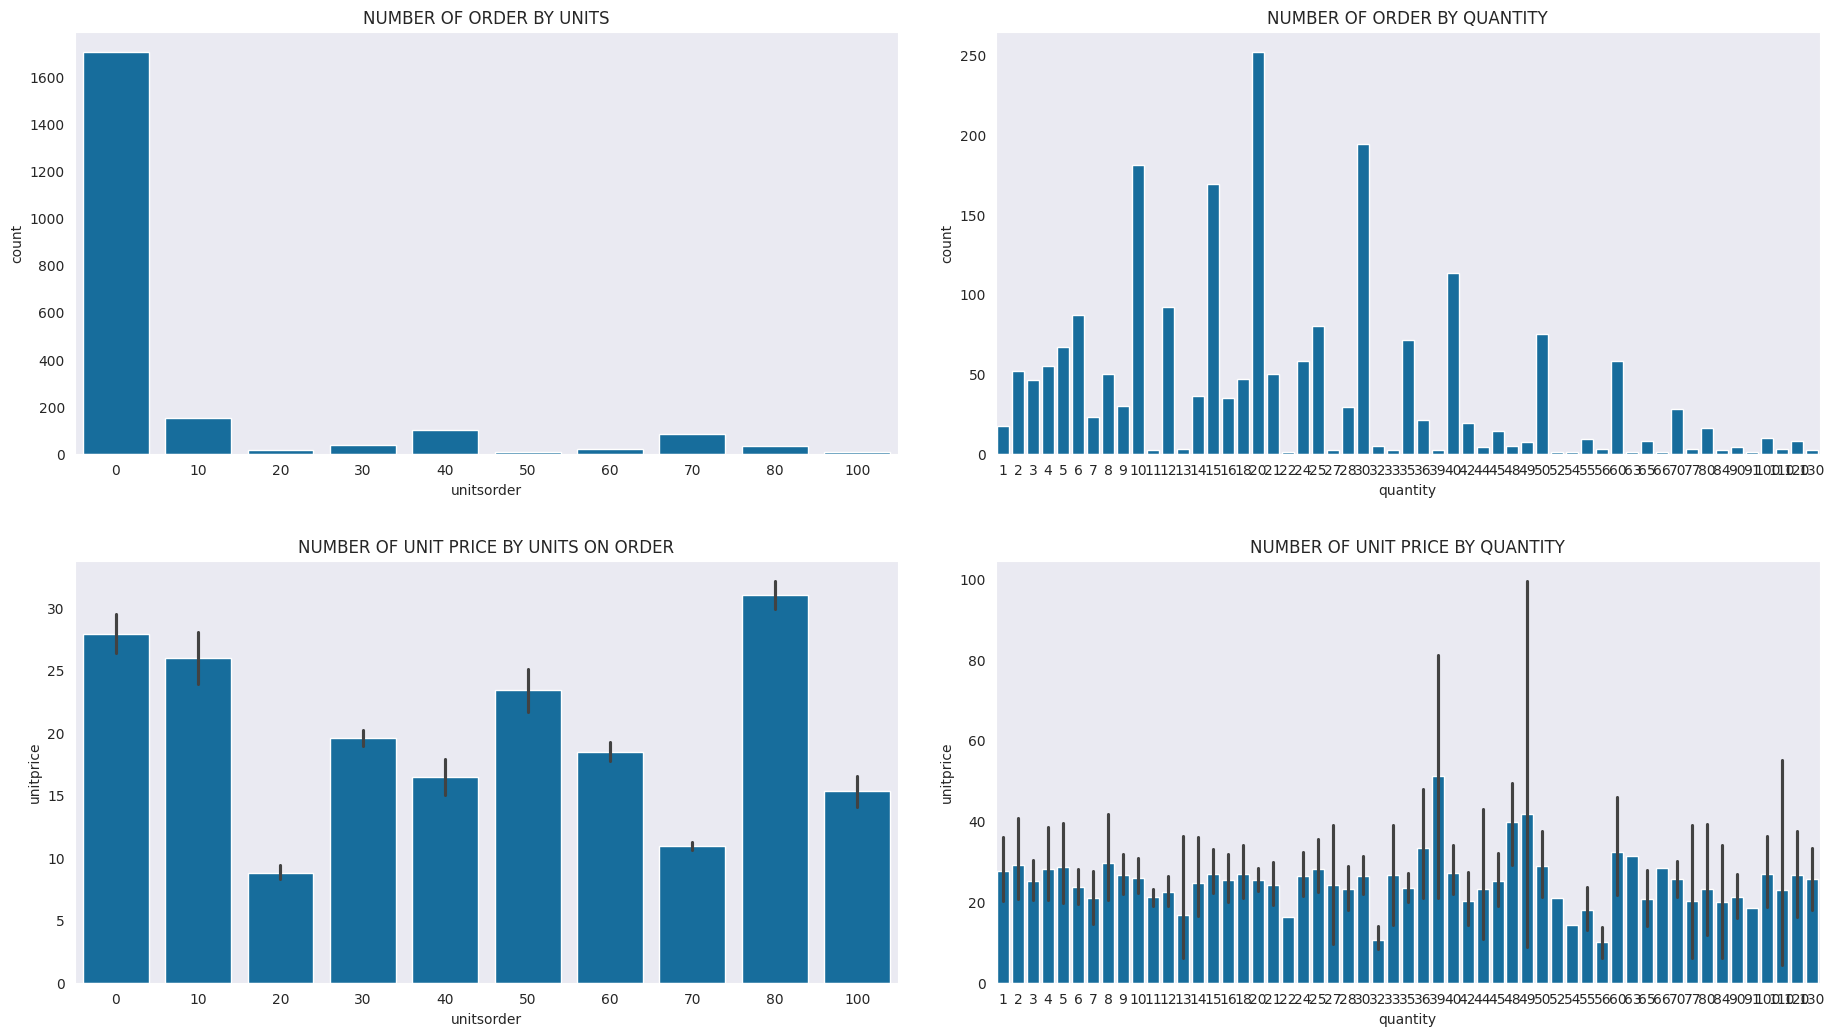

In [ ]:
sns.set_style('dark')
sns.set_palette('colorblind')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (19, 11))
sns.countplot(data = data, x = 'unitsorder', ax=axes[0,0])
sns.countplot(data = data, x = 'quantity', ax=axes[0,1])
sns.barplot(data = data, x = 'unitsorder',y = 'unitprice', ax=axes[1,0])
sns.barplot(data = data, x = 'quantity',y = 'unitprice', ax=axes[1,1])

axes[0,0].set_title('NUMBER OF ORDER BY UNITS')
axes[0,1].set_title('NUMBER OF ORDER BY QUANTITY')
axes[1,0].set_title('NUMBER OF UNIT PRICE BY UNITS ON ORDER')
axes[1,1].set_title('NUMBER OF UNIT PRICE BY QUANTITY')

fig.tight_layout(pad = 3)

## CUSTOMER SEGMENTATION

In [ ]:
# encode the data

final_data = data.copy()

encoder = LabelEncoder()

cols = ['productname','categoryname','companyname','contactname','country',
        'requireddate','shippeddate']
for col in cols:
  data[col] = encoder.fit_transform(data[col])

In [ ]:
data.head()

,orderid,productname,categoryname,unitprice,quantity,unitsorder,suppliers,companyname,contactname,freight,shippeddate,requireddate,country
0,10289,1,1,8.0000,30,70,1,4,6,0,23,34,15
1,10405,1,1,8.0000,50,70,1,4,6,0,97,121,15
2,10485,1,1,8.0000,20,70,1,4,6,0,137,164,15
3,10540,1,1,10.0000,60,70,1,4,6,0,183,209,15
4,10591,1,1,10.0000,14,70,1,4,6,0,200,231,15


In [ ]:
# scale the dataset
scaler = StandardScaler()
columns = data.columns
data = scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data = data, columns = list(columns))

In [ ]:
# apply pca
columns = ['column1', 'column2','column3']
pca = PCA(n_components=3)
data = pca.fit_transform(data)
data = pd.DataFrame(data=data, columns=columns)

In [ ]:
data.head()

,column1,column2,column3
0,-2.835574,-1.177356,-3.716971
1,-1.832303,-1.220051,-3.737418
2,-1.239545,-1.118326,-3.719751
3,-0.709943,-1.242529,-3.732765
4,-0.379741,-1.096903,-3.702040


In [ ]:
px.scatter_3d(data_frame=data, x = 'column1',
              y = 'column2', z = 'column3',
              width = 600, color = predictions)

In [ ]:
# create cluster

kmeans = KMeans(n_clusters=4, n_init='auto',random_state=23)
predictions = kmeans.fit_predict(data)

In [ ]:
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# checking a new discount on each products

final_data['clusters'] = [f'clusters_{x}' for x in predictions]
final_data['discount'] = final_data['unitprice'] * final_data['unitsorder'] / 100

In [ ]:
final_data.head()

,orderid,productname,categoryname,unitprice,quantity,unitsorder,suppliers,companyname,contactname,freight,shippeddate,requireddate,country,clusters,discount
0,10289,Aniseed Syrup,Condiments,8.0000,30,70,1,Exotic Liquids,Charlotte Cooper,0,1996-08-28,1996-09-23,UK,clusters_0,5.6000
1,10405,Aniseed Syrup,Condiments,8.0000,50,70,1,Exotic Liquids,Charlotte Cooper,0,1997-01-22,1997-02-03,UK,clusters_0,5.6000
2,10485,Aniseed Syrup,Condiments,8.0000,20,70,1,Exotic Liquids,Charlotte Cooper,0,1997-03-31,1997-04-08,UK,clusters_0,5.6000
3,10540,Aniseed Syrup,Condiments,10.0000,60,70,1,Exotic Liquids,Charlotte Cooper,0,1997-06-13,1997-06-16,UK,clusters_2,7.0000
4,10591,Aniseed Syrup,Condiments,10.0000,14,70,1,Exotic Liquids,Charlotte Cooper,0,1997-07-16,1997-07-21,UK,clusters_2,7.0000


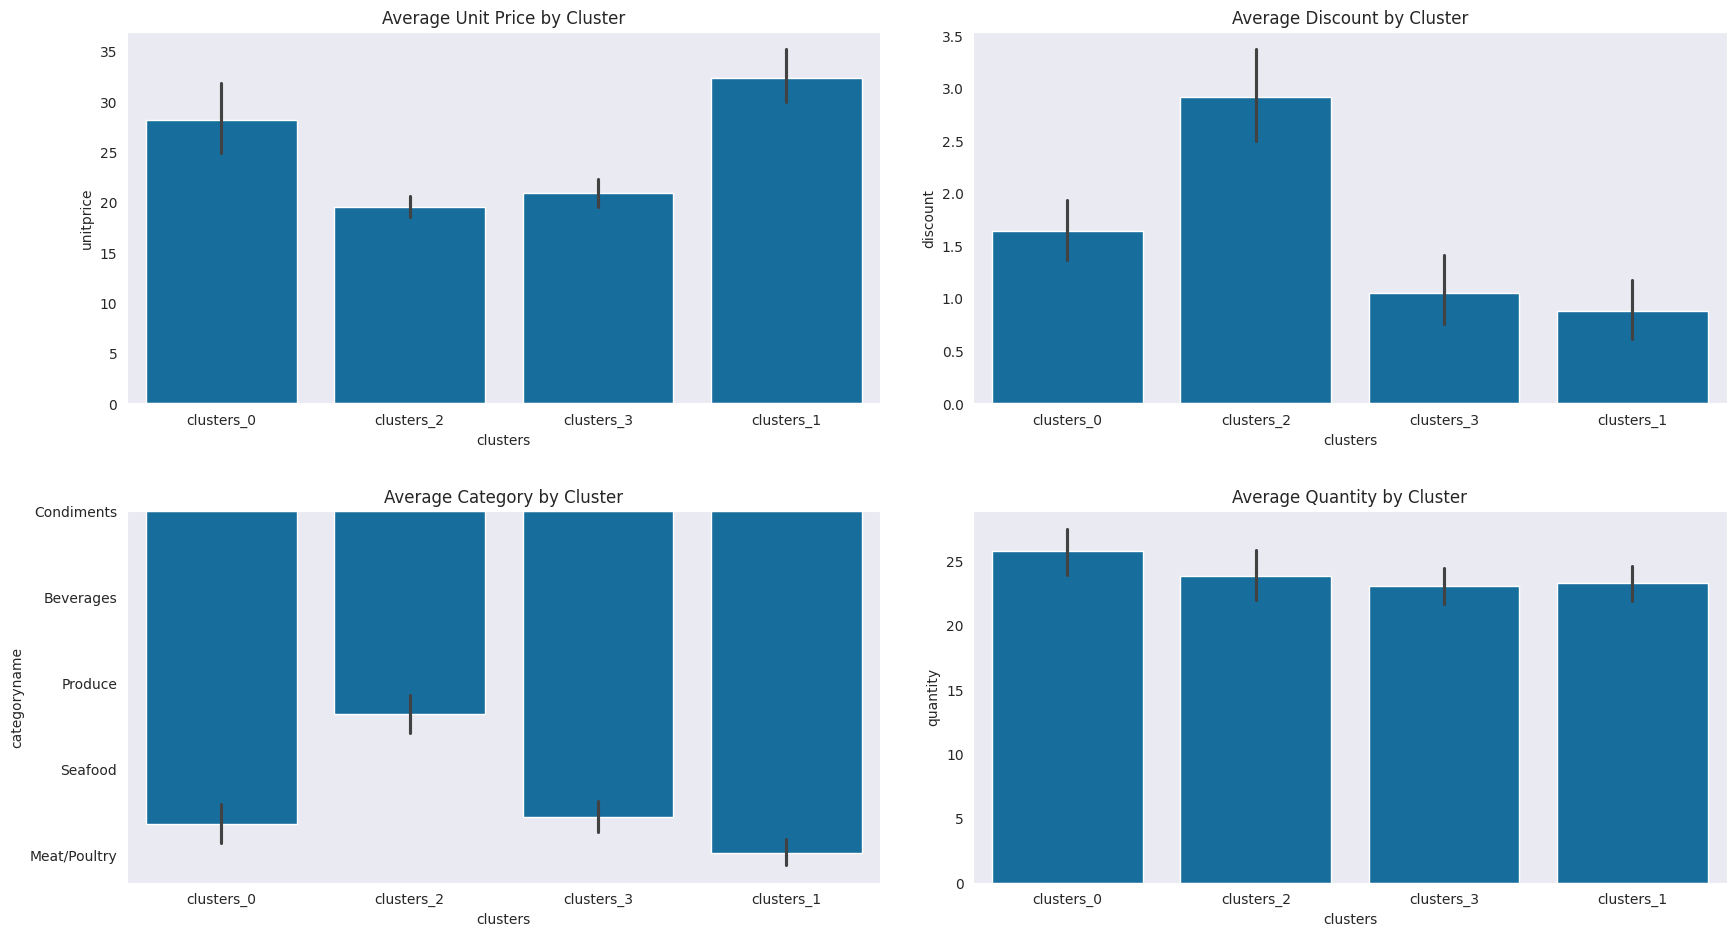

In [ ]:
sns.set_style('dark')
sns.set_palette('colorblind')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
sns.barplot(data = final_data, x = 'clusters',y = 'unitprice', ax=axes[0,0])
sns.barplot(data = final_data, x = 'clusters',y = 'discount', ax=axes[0,1])
sns.barplot(data = final_data, x = 'clusters',y = 'categoryname', ax=axes[1,0])
sns.barplot(data = final_data, x = 'clusters',y = 'quantity', ax=axes[1,1])

axes[0,0].set_title('Average Unit Price by Cluster')
axes[0,1].set_title('Average Discount by Cluster')
axes[1,0].set_title('Average Category by Cluster')
axes[1,1].set_title('Average Quantity by Cluster')

fig.tight_layout(pad = 3)

In [ ]:
final_data[final_data['clusters'] == 'clusters_1']

,orderid,productname,categoryname,unitprice,quantity,unitsorder,suppliers,companyname,contactname,freight,shippeddate,requireddate,country,clusters,discount
173,10694,Uncle Bob's Organic Dried Pears,Produce,30.0000,90,0,3,Grandma Kelly's Homestead,Regina Murphy,0,1997-10-09,1997-11-03,USA,clusters_1,0.0000
174,10766,Uncle Bob's Organic Dried Pears,Produce,30.0000,35,0,3,Grandma Kelly's Homestead,Regina Murphy,0,1997-12-09,1998-01-02,USA,clusters_1,0.0000
175,10790,Uncle Bob's Organic Dried Pears,Produce,30.0000,3,0,3,Grandma Kelly's Homestead,Regina Murphy,0,1997-12-26,1998-01-19,USA,clusters_1,0.0000
176,10833,Uncle Bob's Organic Dried Pears,Produce,30.0000,20,0,3,Grandma Kelly's Homestead,Regina Murphy,0,1998-01-23,1998-02-12,USA,clusters_1,0.0000
177,10858,Uncle Bob's Organic Dried Pears,Produce,30.0000,5,0,3,Grandma Kelly's Homestead,Regina Murphy,0,1998-02-03,1998-02-26,USA,clusters_1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10998,Sirop d'rable,Condiments,28.5000,7,0,29,Forts d'rables,Chantal Goulet,0,1998-04-17,1998-04-17,Canada,clusters_1,0.0000
2151,11034,Sirop d'rable,Condiments,28.5000,6,0,29,Forts d'rables,Chantal Goulet,0,1998-04-27,1998-06-01,Canada,clusters_1,0.0000
2152,11042,Sirop d'rable,Condiments,28.5000,4,0,29,Forts d'rables,Chantal Goulet,0,1998-05-01,1998-05-06,Canada,clusters_1,0.0000
2153,11052,Sirop d'rable,Condiments,28.5000,10,0,29,Forts d'rables,Chantal Goulet,0,1998-05-01,1998-05-25,Canada,clusters_1,0.0000


<Axes: xlabel='clusters', ylabel='count'>

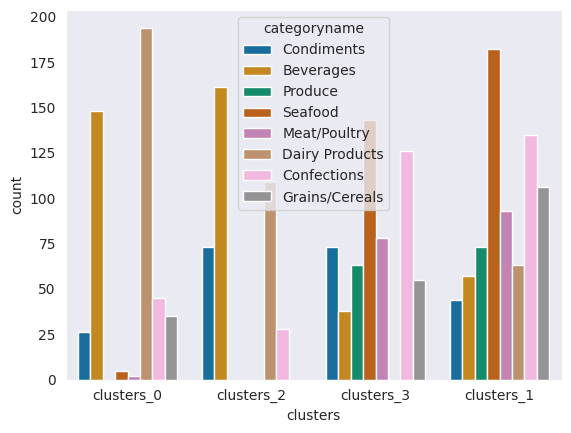

In [ ]:
sns.countplot(data = final_data, x = 'clusters', hue ='categoryname')

In [ ]:
final_data.describe()

,orderid,quantity,unitsorder,suppliers,shippeddate,requireddate
count,2155.000000,2155.000000,2155.000000,2155.000000,2082,2155
mean,10659.375870,23.812993,8.074246,14.488167,1997-08-04 04:05:31.988472704,1997-09-02 02:27:40.510440832
min,10248.000000,1.000000,0.000000,1.000000,1996-07-10 00:00:00,1996-07-24 00:00:00
25%,10451.000000,10.000000,0.000000,7.000000,1997-02-24 00:00:00,1997-03-18 12:00:00
50%,10657.000000,20.000000,0.000000,14.000000,1997-09-01 00:00:00,1997-10-02 00:00:00
75%,10862.500000,30.000000,0.000000,21.000000,1998-01-30 00:00:00,1998-03-03 00:00:00
max,11077.000000,130.000000,100.000000,29.000000,1998-05-06 00:00:00,1998-06-11 00:00:00
std,241.378032,19.022047,19.748983,8.228640,NaN,NaN


##  KEY INSIGHT ABOUT SALES AND PRODUCTS PERFORMANCE

In [ ]:
# database connection
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
# create a function for database connection

def connect_db(hostname, username, password, db_name, port):
  connection = None
  try:
    connection = mysql.connector.connect(
        host = hostname,
        user = username,
        passwd = password,
        database = db_name,
        port = port
    )
    print(f'Connected to Database {db_name} successfully')
  except Error as err:
    print(f'Error: {err}')

  return connection

In [ ]:
hostname = input('Host: ')
username = input('username: ')
password = input('password: ')
db_name = input('database: ')
port = input('port: ')
clear_output()

In [ ]:
connection = connect_db(hostname,username,password,db_name,port)

Connected to Database northwind successfully


In [ ]:
# A function for accessing the data

def read_query(connection, query):
  result = None
  try:
    cursor = connection.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
  except Error as err:
      print(f'Error: {err}')

  return result

In [ ]:
import pandas as pd

query = "SELECT quantity, unitprice FROM `Order Details`"
data = pd.read_sql_query(query, connection)
data.head()

<ipython-input-63-e9a7ae480854>:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,quantity,unitprice
0,12,14.0
1,10,9.8
2,5,34.8
3,9,18.6
4,40,42.4


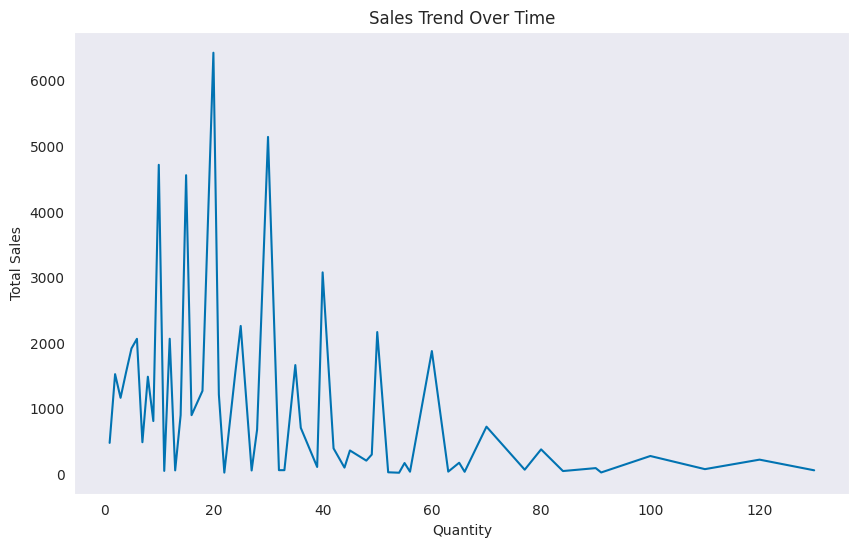

In [ ]:
# Generate sales trend insights

sales_trend = data.groupby('quantity')['unitprice'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='quantity', y='unitprice', data=sales_trend)
plt.title('Sales Trend Over Time')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
import pandas as pd

query = "SELECT unitsonorder, unitprice FROM Products"
data = pd.read_sql_query(query, connection)
data.head()

<ipython-input-83-15fdba917ed5>:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,unitsonorder,unitprice
0,0,18.00
1,40,19.00
2,70,10.00
3,0,22.00
4,0,21.35


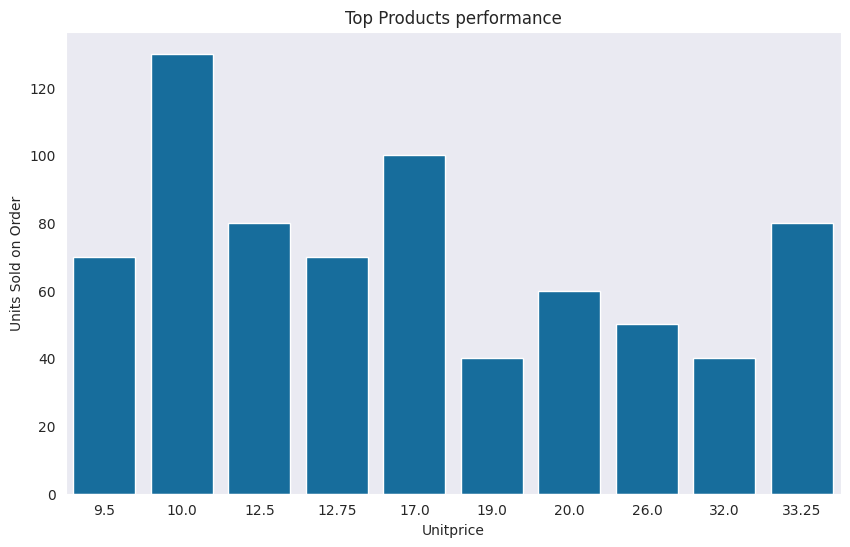

In [ ]:
# Product performance insights

product_performance = data.groupby('unitprice')['unitsonorder'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='unitprice', y='unitsonorder', data=product_performance.nlargest(10, 'unitsonorder'))
plt.title('Top Products performance')
plt.xlabel('Unitprice')
plt.ylabel('Units Sold on Order')
plt.show()